In [17]:
# Importing Pandas for Dataframe Manipulation as well as Seaborn and Matplotlib for Data Visualization purposes.
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Reading in our Breast Cancer Data and printing out the first five rows!
df = pd.read_csv("Breast_cancer_data.csv")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [16]:
# Printing out various statistics about each attribute value or feature in our dataset.
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [15]:
# Checking to see how many null or missing values we have in each column of our data.
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

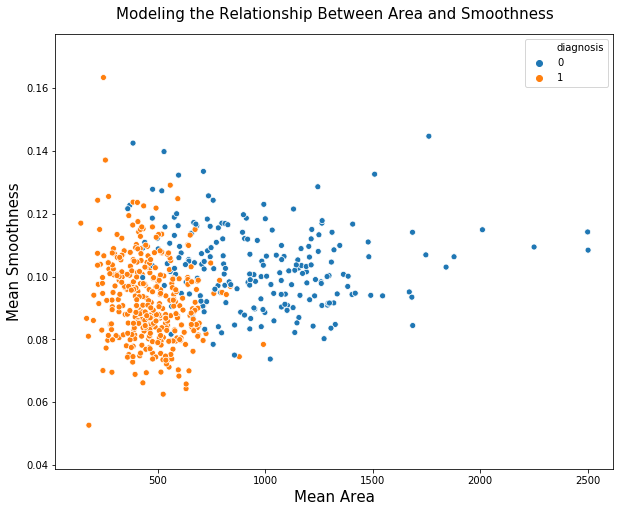

In [35]:
# Setting the dimensions of our figure to equal 10 x 8.
plt.figure(figsize=(10, 8))

# Using Seaborn's 'scatterplot' function to model the relationship between mean area and mean smoothness.
sns.scatterplot(x = 'mean_area', y = 'mean_smoothness', hue = 'diagnosis', data = df)

# Adding metadata (axis labels and title) to our plot for increased readability.
plt.title("Modeling the Relationship Between Area and Smoothness", pad=15, fontsize=15)
plt.xlabel("Mean Area", fontsize=15)
plt.ylabel("Mean Smoothness", fontsize=15)

plt.show()

In [48]:
# Importing all necessary objects and functions from Sklearn.
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Partitioning our data into X and Y subsets.
x_data = df[["mean_area", "mean_smoothness"]]
y_data = df["diagnosis"]

# Retrieving our X and Y train-test sets by calling the 'train_test_split' function (80-20 split).
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

# Creating a new Support Vector Machine classifier.
model = SVC(kernel='linear')

# Fitting our classifier with the X and Y training data we generated earlier.
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

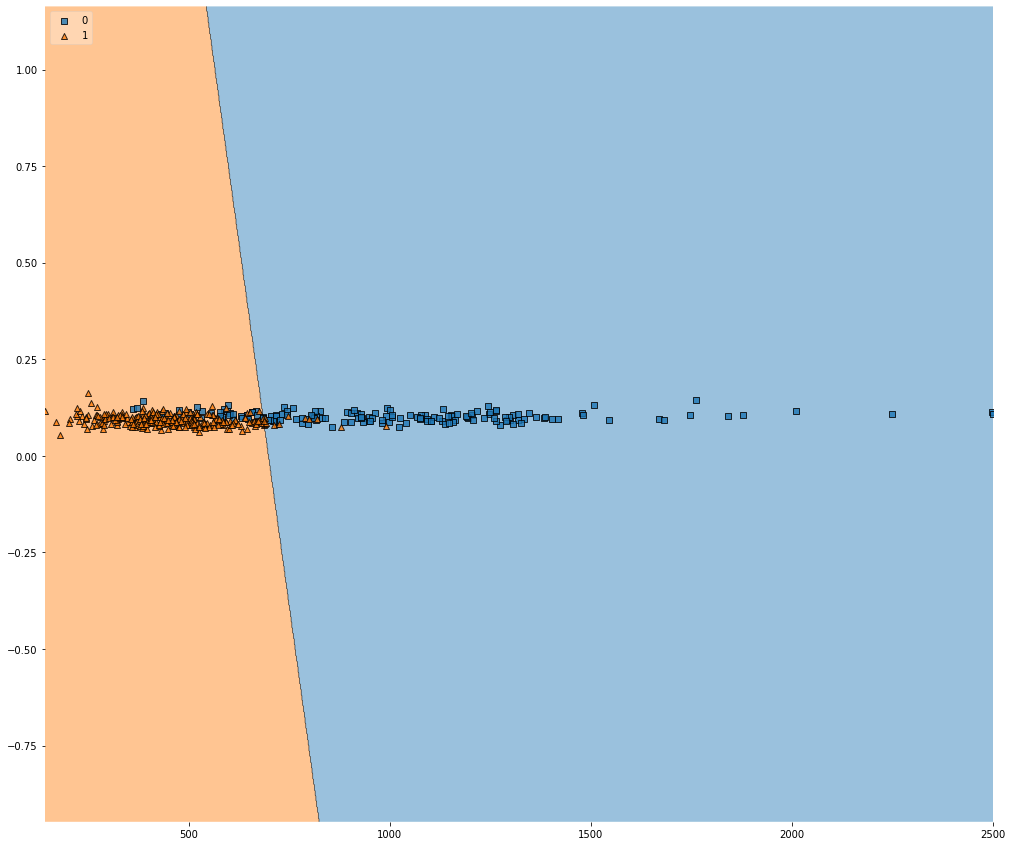

In [49]:
# Importing the "plot_decision_regions" function to model a decision boundary.
from mlxtend.plotting import plot_decision_regions

# Setting the size and dimension of our plot to be equal to 17 by 15.
plt.figure(figsize=(17, 15))

# Visually representing the decision boundary between our X (mean area and smoothness) and Y (diagnosis).
plot_decision_regions(x_train.to_numpy(), y_train.to_numpy(), clf=model, legend=2)

In [53]:
# Making predictions with our model!
predictions = model.predict(x_test)
predictions

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1], dtype=int64)

In [54]:
# Viewing the accuracy measure of our model on the X and Y test data.
model.score(x_test, y_test)

0.868421052631579

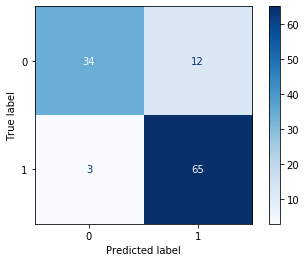

In [56]:
from sklearn.metrics import *

# Plotting a confusion matrix to see where our model made the most misclassifications (false positives and negatives).
plot_confusion_matrix(model, x_test, y_test, cmap='Blues')
plt.show()